In [36]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    LeakyReLU,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
)
from tensorflow.keras import layers, models
import numpy as np

import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [37]:
#  Make the dataset

N = 1000
X = np.random.random((N,2)) * 6 -3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

In [38]:
X

array([[-2.66973973,  2.33065306],
       [ 2.0448897 , -1.64996506],
       [ 2.5348613 , -2.83096019],
       ...,
       [-2.47815264,  2.58856008],
       [ 0.73604742, -2.33212251],
       [-1.17599016,  0.35141637]])

In [40]:
Y

array([ 1.34595184e+00, -3.47877499e-01, -2.46534385e-01, -5.29554054e-01,
        3.25233667e-01, -1.69326891e+00,  3.92425461e-01, -4.39754657e-01,
        7.94768422e-01, -2.83144201e-01,  6.23855151e-01,  6.09798757e-01,
       -4.99770480e-01,  1.04820269e+00, -4.84936420e-01, -1.46318593e+00,
       -1.05076126e+00, -9.67312446e-01,  1.37720133e-01,  1.38351382e+00,
       -9.64878376e-01, -3.38437920e-01,  1.08248844e+00,  7.64395729e-01,
       -1.12256670e+00,  6.32526526e-01,  7.25700991e-01,  2.32058586e-01,
       -7.18654792e-01,  2.26574296e-01,  1.55423015e+00, -2.81837820e-02,
       -1.10382042e+00,  3.34432856e-01,  8.03335827e-01, -1.74387940e+00,
       -4.60439722e-01,  6.73485850e-01,  6.10791291e-01, -1.75178532e-01,
       -1.06744321e+00,  5.13621555e-02,  1.65082471e-01,  1.12315162e-01,
        4.73471263e-01, -1.38104415e-02, -1.04993344e-01,  3.02328483e-01,
        1.35716058e+00, -5.18687995e-01, -5.55128694e-01, -7.56164017e-01,
        2.43100777e-01,  

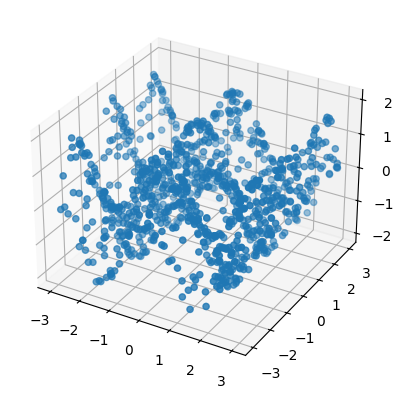

In [41]:
# Plot it

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [42]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation="relu", input_shape=(2,)),
        # tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile and fit

opt = tf.keras.optimizers.Adam(0.001)
model.compile(
    optimizer = opt,
    loss = tf.keras.losses.MeanSquaredError(),
    # metrics = ["accuracy"]
)


In [45]:
history = model.fit(X, Y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0518
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0026 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9657 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0123 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0139 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9231 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9011 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0002 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9746  
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9344 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9697  
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9626
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9801
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9605
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

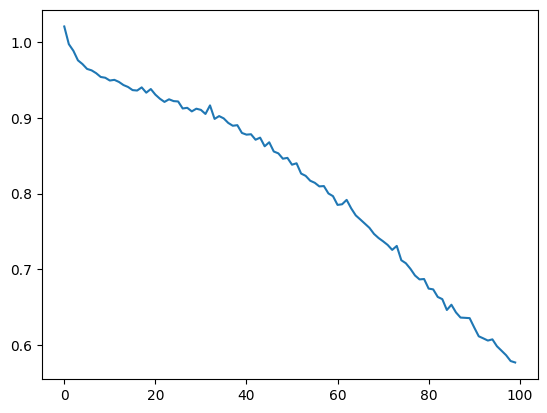

In [47]:
# Plot the loss

plt.plot(history.history["loss"], label = "loss")
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


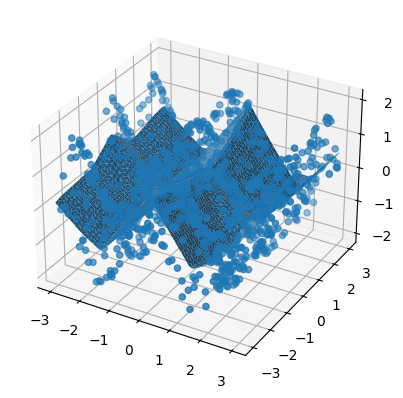

In [48]:
# Plot the prediction surfaces
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface Plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.1, antialiased = True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


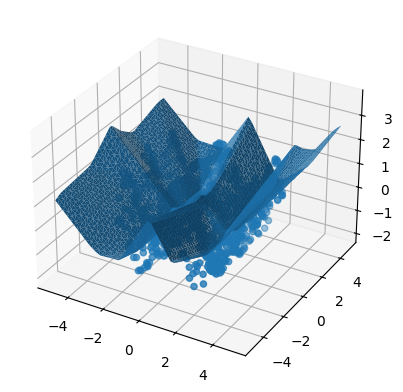

In [49]:
# Plot the prediction surfaces
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.1, antialiased = True)
plt.show()